In [36]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
from collections import defaultdict
import cv2

In [4]:
dr = pd.read_csv('DR_dataset_archive 3/trainLabels_cropped.csv')

In [5]:
dr

Unnamed: 0.1  Unnamed: 0        image  level
0                 0           0      10_left      0
1                 1           1     10_right      0
2                 2           2      13_left      0
3                 3           3     13_right      0
4                 4           4      15_left      1
...             ...         ...          ...    ...
35103         35104       35121  44347_right      0
35104         35105       35122   44348_left      0
35105         35106       35123  44348_right      0
35106         35107       35124   44349_left      0
35107         35108       35125  44349_right      1

[35108 rows x 4 columns]

- The columns 'Unnamed: 0.1' and 'Unnamed: 0' looks like index
- 'image' is the file name of the images

In [6]:
dr['level'].value_counts()

level
0    25802
2     5288
1     2438
3      872
4      708
Name: count, dtype: int64

- level is the label of the image indicating the stages of Diabetes Retinopathy

In [15]:
v =0
for i in dr['Unnamed: 0'].duplicated():
    if i:
        print(v,i)
    v +=1

In [23]:
selected_records = dr.groupby('level').first().reset_index()
selected_records

level  Unnamed: 0.1  Unnamed: 0     image
0      0             0           0   10_left
1      1             4           4   15_left
2      2             5           5  15_right
3      3            90          90   99_left
4      4             6           6   16_left

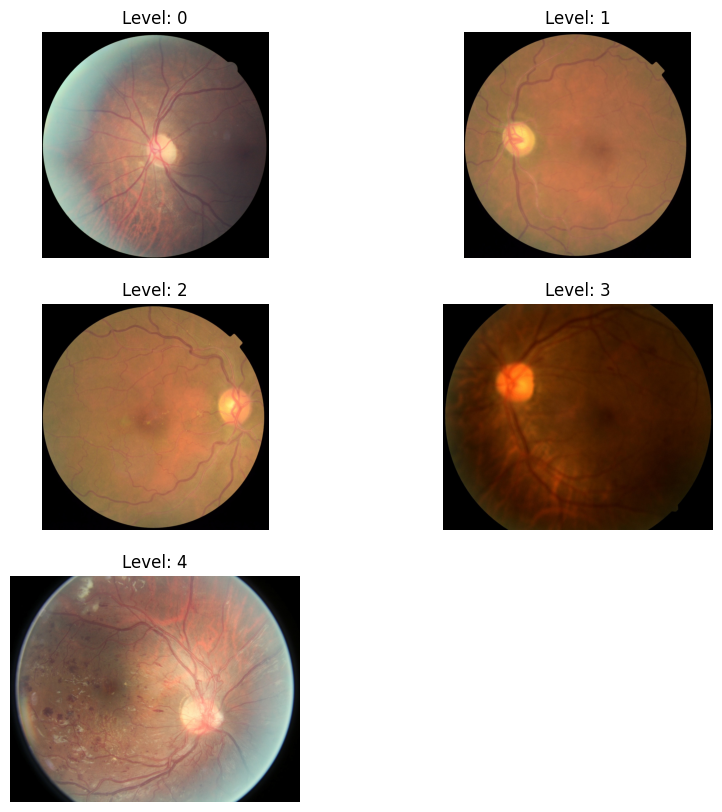

In [25]:
# Path to the folder containing all images
image_folder = 'DR_dataset_archive 3/resized_train_cropped/resized_train_cropped/'

# Display the selected images
plt.figure(figsize=(10, 10))
for i, row in selected_records.iterrows():
    image_filename = f"{row['image']}.jpeg"  # Adjust extension if necessary (e.g., .png)
    img_path = os.path.join(image_folder, image_filename)

    # Check if the image file exists before trying to open it
    if os.path.exists(img_path):
        img = Image.open(img_path)
        plt.subplot(3, 2, i + 1)  # Adjust the grid size as needed (3 rows, 2 columns here)
        plt.imshow(img)
        plt.axis('off')  # Hide axes
        plt.title(f"Level: {row['level']}")
    else:
        print(f"Image {image_filename} not found in {image_folder}")

plt.show()


In [62]:
selected_records1 = dr.groupby('level').last().reset_index()
selected_records1

level  Unnamed: 0.1  Unnamed: 0        image
0      0         35107       35124   44349_left
1      1         35108       35125  44349_right
2      2         35046       35063  44263_right
3      3         34980       34997  44200_right
4      4         35032       35049  44249_right

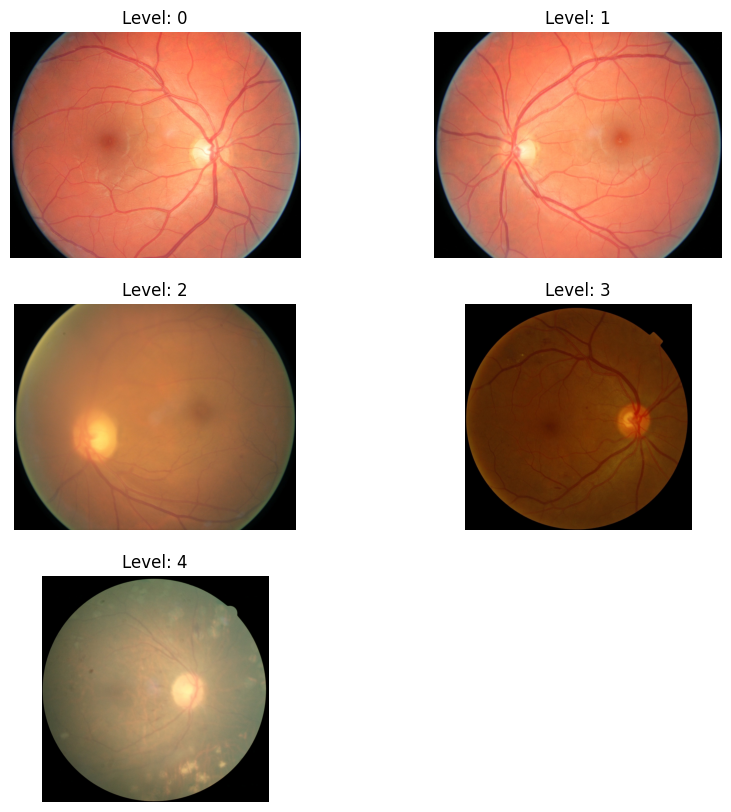

In [63]:
# Path to the folder containing all images
image_folder = 'DR_dataset_archive 3/resized_train_cropped/resized_train_cropped/'

# Display the selected images
plt.figure(figsize=(10, 10))
for i, row in selected_records1.iterrows():
    image_filename = f"{row['image']}.jpeg"  # Adjust extension if necessary (e.g., .png)
    img_path = os.path.join(image_folder, image_filename)

    # Check if the image file exists before trying to open it
    if os.path.exists(img_path):
        img = Image.open(img_path)
        plt.subplot(3, 2, i + 1)  # Adjust the grid size as needed (3 rows, 2 columns here)
        plt.imshow(img)
        plt.axis('off')  # Hide axes
        plt.title(f"Level: {row['level']}")
    else:
        print(f"Image {image_filename} not found in {image_folder}")

plt.show()


In [69]:
selected_records2 = pd.concat([selected_records,selected_records1],axis=0)
selected_records2

level  Unnamed: 0.1  Unnamed: 0        image
0      0             0           0      10_left
1      1             4           4      15_left
2      2             5           5     15_right
3      3            90          90      99_left
4      4             6           6      16_left
0      0         35107       35124   44349_left
1      1         35108       35125  44349_right
2      2         35046       35063  44263_right
3      3         34980       34997  44200_right
4      4         35032       35049  44249_right

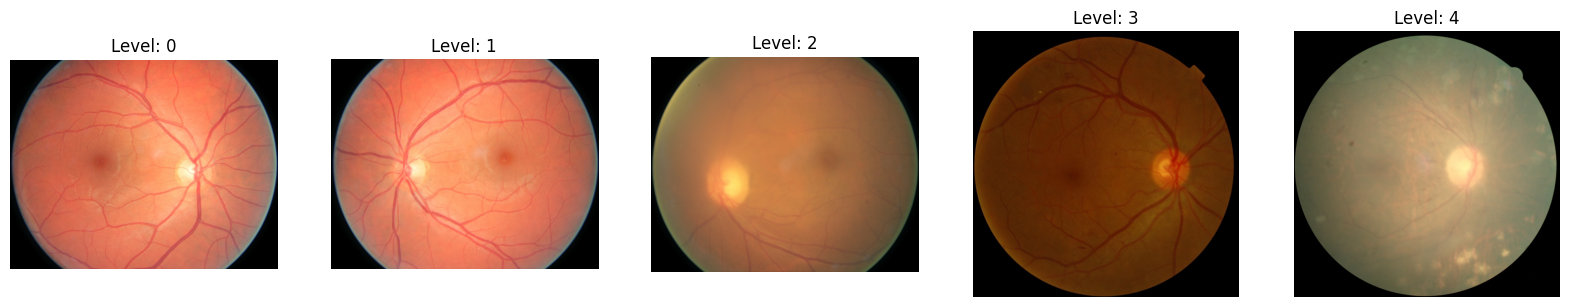

In [79]:
# Path to the folder containing all images
image_folder = 'DR_dataset_archive 3/resized_train_cropped/resized_train_cropped/'

# Display the selected images
plt.figure(figsize=(20, 20))
for i, row in selected_records1.iterrows():
    image_filename = f"{row['image']}.jpeg"  # Adjust extension if necessary (e.g., .png)
    img_path = os.path.join(image_folder, image_filename)

    # Check if the image file exists before trying to open it
    if os.path.exists(img_path):
        img = Image.open(img_path)
        plt.subplot(5, 5, i + 1)  # Adjust the grid size as needed (3 rows, 2 columns here)
        plt.imshow(img)
        plt.axis('off')  # Hide axes
        plt.title(f"Level: {row['level']}")
    else:
        print(f"Image {image_filename} not found in {image_folder}")

plt.show()


In [26]:
# Path to the folder containing all images
image_folder = 'DR_dataset_archive 3/resized_train_cropped/resized_train_cropped/'

# Dictionary to store image sizes
image_sizes = {}

# Loop through all files in the folder
for image_file in os.listdir(image_folder):
    # Check if the file is an image (you can specify more extensions if needed)
    if image_file.endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(image_folder, image_file)
        
        # Open the image and get its size
        with Image.open(img_path) as img:
            width, height = img.size
            image_sizes[image_file] = (width, height)

# Display the sizes of all images
for image, size in image_sizes.items():
    print(f"{image}: {size[0]}x{size[1]} pixels")


11909_right.jpeg: 1024x1024 pixels
27780_right.jpeg: 1024x840 pixels
36065_right.jpeg: 1024x954 pixels
6514_right.jpeg: 1024x839 pixels
482_right.jpeg: 1024x775 pixels
21203_left.jpeg: 1024x804 pixels
44330_right.jpeg: 1024x763 pixels
7708_right.jpeg: 1024x783 pixels
26912_right.jpeg: 1024x1024 pixels
20145_right.jpeg: 1024x1024 pixels
28322_left.jpeg: 1024x798 pixels
30832_right.jpeg: 1024x1024 pixels
15652_left.jpeg: 1024x913 pixels
22280_right.jpeg: 1024x814 pixels
2648_left.jpeg: 1024x794 pixels
38866_right.jpeg: 1024x1024 pixels
32779_right.jpeg: 1024x1024 pixels
25445_right.jpeg: 1024x1024 pixels
2362_left.jpeg: 1024x795 pixels
34236_left.jpeg: 1024x921 pixels
11098_right.jpeg: 1024x816 pixels
7217_right.jpeg: 1024x811 pixels
10284_right.jpeg: 1024x1024 pixels
17441_right.jpeg: 1024x1024 pixels
14598_right.jpeg: 1024x809 pixels
14916_right.jpeg: 1024x805 pixels
8486_right.jpeg: 1024x1024 pixels
29612_right.jpeg: 1024x1024 pixels
10241_left.jpeg: 1024x796 pixels
32266_right.jpeg: 

In [29]:
# Replace with the actual path to your image folder
image_folder = 'DR_dataset_archive 3/resized_train_cropped/resized_train_cropped/'

# Dictionary to store counts of images grouped by size
image_sizes = defaultdict(int)

# Loop through all files in the folder
for image_file in os.listdir(image_folder):
    # Check if the file is an image (you can specify more extensions if needed)
    if image_file.endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(image_folder, image_file)
        
        # Open the image and get its size
        with Image.open(img_path) as img:
            size = img.size  # Tuple (width, height)
            image_sizes[size] += 1  # Increment count for this size

# Display the count of images for each size
for size, count in image_sizes.items():
    print(f"Size {size[0]}x{size[1]} pixels: {count} images")


Size 1024x1024 pixels: 12333 images
Size 1024x840 pixels: 1508 images
Size 1024x954 pixels: 308 images
Size 1024x839 pixels: 429 images
Size 1024x775 pixels: 45 images
Size 1024x804 pixels: 409 images
Size 1024x763 pixels: 25 images
Size 1024x783 pixels: 100 images
Size 1024x798 pixels: 258 images
Size 1024x913 pixels: 116 images
Size 1024x814 pixels: 256 images
Size 1024x794 pixels: 207 images
Size 1024x795 pixels: 248 images
Size 1024x921 pixels: 248 images
Size 1024x816 pixels: 232 images
Size 1024x811 pixels: 222 images
Size 1024x809 pixels: 288 images
Size 1024x805 pixels: 275 images
Size 1024x796 pixels: 246 images
Size 1024x929 pixels: 131 images
Size 1024x1023 pixels: 662 images
Size 1024x818 pixels: 276 images
Size 1024x976 pixels: 82 images
Size 1024x830 pixels: 127 images
Size 1024x799 pixels: 287 images
Size 1024x802 pixels: 335 images
Size 1024x793 pixels: 176 images
Size 1024x812 pixels: 283 images
Size 1024x1022 pixels: 375 images
Size 1024x1029 pixels: 56 images
Size 10

In [37]:
# Define the input and output directories
input_folder = 'DR_dataset_archive 3/resized_train_cropped/resized_train_cropped/'  # Change this to your input folder
output_folder = 'DR_dataset_archive 3/resized_train_cropped/resized_train_cropped_1024/'  # Change this to your output folder
target_width = 1024  # Define the target width

# Create the output directory if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Iterate over all files in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Check for image file extensions
        # Read the image
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path)

        # Check if the image was loaded successfully
        if img is None:
            print(f"Error loading image: {img_path}")
            continue

        # Calculate the new dimensions to maintain aspect ratio
        height = int(img.shape[0] * (target_width / img.shape[1]))
        new_size = (target_width, height)

        # Resize the image to the new size
        resized_img = cv2.resize(img, new_size)

        # Save the resized image to the output folder
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, resized_img)

print("Resizing completed!")


Resizing completed!


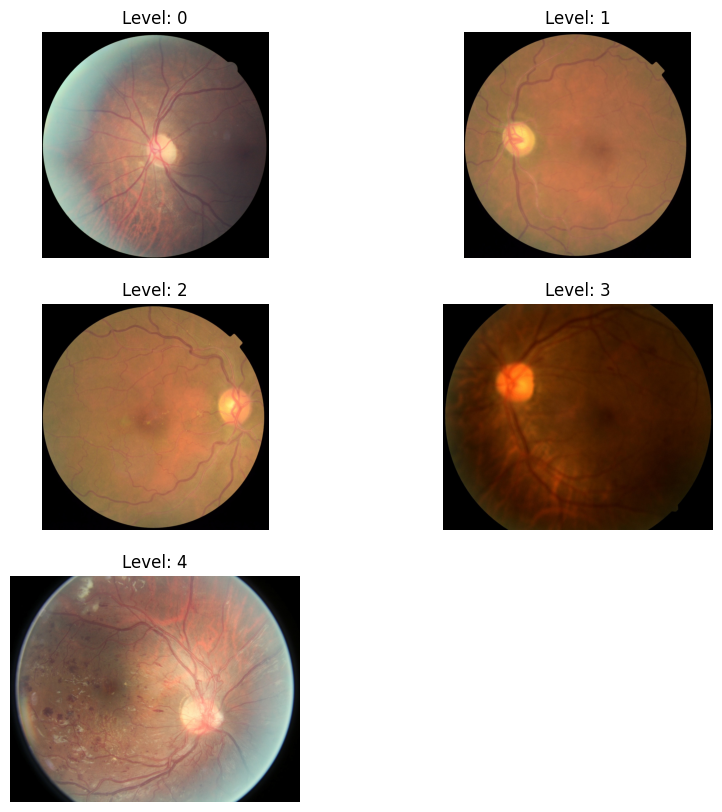

In [39]:
# Path to the folder containing all images
image_folder = 'DR_dataset_archive 3/resized_train_cropped/resized_train_cropped/'

# Display the selected images
plt.figure(figsize=(10, 10))
for i, row in selected_records.iterrows():
    image_filename = f"{row['image']}.jpeg"  # Adjust extension if necessary (e.g., .png)
    img_path = os.path.join(image_folder, image_filename)

    # Check if the image file exists before trying to open it
    if os.path.exists(img_path):
        img = Image.open(img_path)
        plt.subplot(3, 2, i + 1)  # Adjust the grid size as needed (3 rows, 2 columns here)
        plt.imshow(img)
        plt.axis('off')  # Hide axes
        plt.title(f"Level: {row['level']}")
    else:
        print(f"Image {image_filename} not found in {image_folder}")

plt.show()


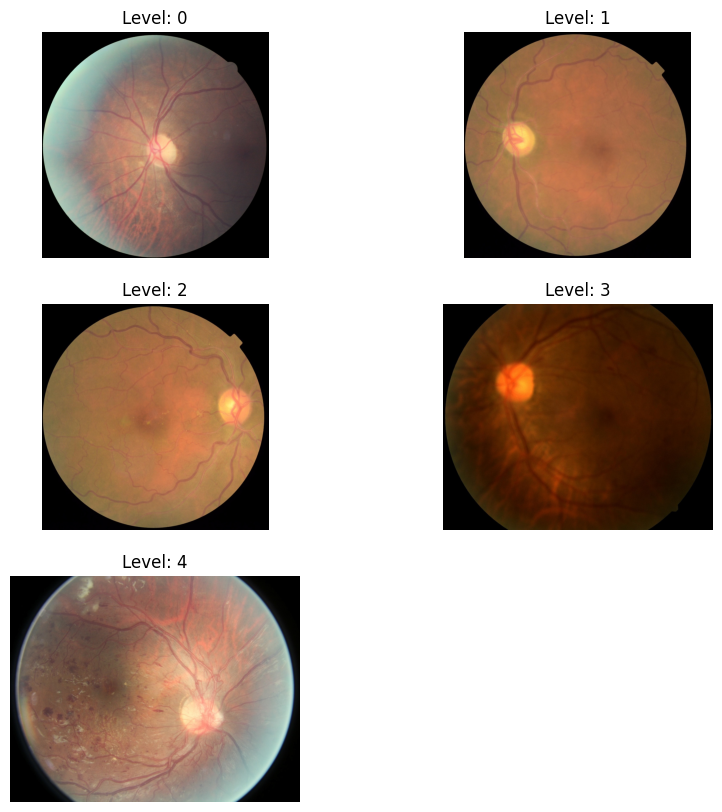

In [38]:
# Path to the folder containing all images
image_folder = 'DR_dataset_archive 3/resized_train_cropped/resized_train_cropped_1024/'

# Display the selected images
plt.figure(figsize=(10, 10))
for i, row in selected_records.iterrows():
    image_filename = f"{row['image']}.jpeg"  # Adjust extension if necessary (e.g., .png)
    img_path = os.path.join(image_folder, image_filename)

    # Check if the image file exists before trying to open it
    if os.path.exists(img_path):
        img = Image.open(img_path)
        plt.subplot(3, 2, i + 1)  # Adjust the grid size as needed (3 rows, 2 columns here)
        plt.imshow(img)
        plt.axis('off')  # Hide axes
        plt.title(f"Level: {row['level']}")
    else:
        print(f"Image {image_filename} not found in {image_folder}")

plt.show()


# Checking Image Dimensions and Resizing to Required Input Size

Unique dimensions in dataset: {(821, 1024), (810, 1024), (955, 1024), (966, 1024), (715, 1024), (704, 1024), (1023, 1024), (783, 1024), (772, 1024), (928, 1024), (840, 1024), (734, 1024), (723, 1024), (802, 1024), (685, 1024), (927, 1024), (832, 1024), (764, 1024), (889, 1024), (900, 1024), (862, 1024), (851, 1024), (745, 1024), (930, 1024), (919, 1024), (813, 1024), (824, 1024), (958, 1024), (892, 1024), (881, 1024), (1026, 1024), (1037, 1024), (1015, 1024), (775, 1024), (786, 1024), (920, 1024), (843, 1024), (854, 1024), (977, 1024), (726, 1024), (737, 1024), (882, 1024), (794, 1024), (805, 1024), (950, 1024), (939, 1024), (699, 1024), (688, 1024), (873, 1024), (1018, 1024), (1007, 1024), (767, 1024), (756, 1024), (969, 1024), (980, 1024), (718, 1024), (729, 1024), (922, 1024), (816, 1024), (748, 1024), (895, 1024), (1029, 1024), (778, 1024), (952, 1024), (835, 1024), (846, 1024), (857, 1024), (991, 1024), (740, 1024), (914, 1024), (797, 1024), (808, 1024), (953, 1024), (982, 1024), 

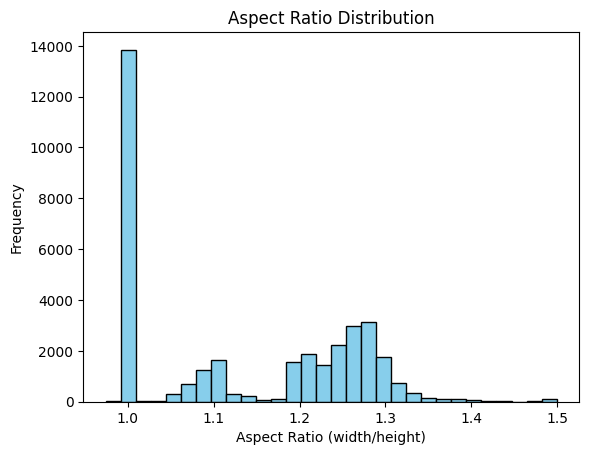

In [40]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

input_folder = 'DR_dataset_archive 3/resized_train_cropped/resized_train_cropped/'
target_size = (224, 224)  # Set this for ResNet/MobileNetV3 or adjust for EfficientNet

dimensions = []
aspect_ratios = []

for filename in os.listdir(input_folder):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path)
        
        if img is not None:
            h, w = img.shape[:2]
            dimensions.append((h, w))
            aspect_ratios.append(w / h)

            # Resize image to target size
            resized_img = cv2.resize(img, target_size)

# Check for uniform dimensions
unique_dimensions = set(dimensions)
print("Unique dimensions in dataset:", unique_dimensions)

# Plot aspect ratio distribution
plt.hist(aspect_ratios, bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Aspect Ratio (width/height)")
plt.ylabel("Frequency")
plt.title("Aspect Ratio Distribution")
plt.show()


# Plotting Label Count and Calculating Class Weights

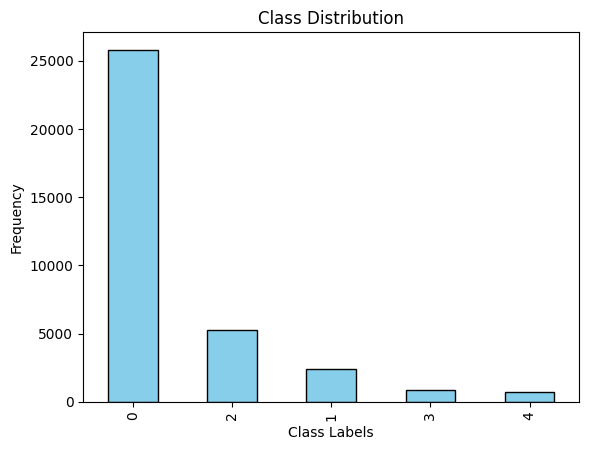

Class Weights: {np.int64(0): np.float64(0.2721339431051856), np.int64(1): np.float64(2.8800656275635768), np.int64(2): np.float64(1.327836611195159), np.int64(4): np.float64(9.917514124293785), np.int64(3): np.float64(8.05229357798165)}


In [52]:
import pandas as pd
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter


labels_df = pd.read_csv("DR_dataset_archive 3/trainLabels_cropped.csv")
# print(labels_df)
# Plot distribution of labels
label_counts = labels_df['level'].value_counts()
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Class Labels")
plt.ylabel("Frequency")
plt.title("Class Distribution")
plt.show()

# Calculate class weights
classes = labels_df['level'].unique()
class_weights = compute_class_weight(class_weight="balanced", classes=classes, y=labels_df['level'])
class_weights_dict = dict(zip(classes, class_weights))
print("Class Weights:", class_weights_dict)


*Inference*
- Tried to undersample the dataset by making all the classes having the same number of images as Class 3. But the accuracy dropped because of the data loss.


# Channel Mean and Standard Deviation

In [53]:
r_mean, g_mean, b_mean = [], [], []
r_std, g_std, b_std = [], [], []

for filename in os.listdir(input_folder):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path)

        if img is not None:
            # Split channels and calculate statistics
            b, g, r = cv2.split(img)
            r_mean.append(np.mean(r))
            g_mean.append(np.mean(g))
            b_mean.append(np.mean(b))
            r_std.append(np.std(r))
            g_std.append(np.std(g))
            b_std.append(np.std(b))

print(f"Channel Means - R: {np.mean(r_mean)}, G: {np.mean(g_mean)}, B: {np.mean(b_mean)}")
print(f"Channel Std Devs - R: {np.mean(r_std)}, G: {np.mean(g_std)}, B: {np.mean(b_std)}")


Channel Means - R: 106.23706133715591, G: 74.19983668017817, B: 53.15100342051515
Channel Std Devs - R: 59.24701180500871, G: 41.45938747950661, B: 29.753706601825655


# Color Histograms and Grayscale Check

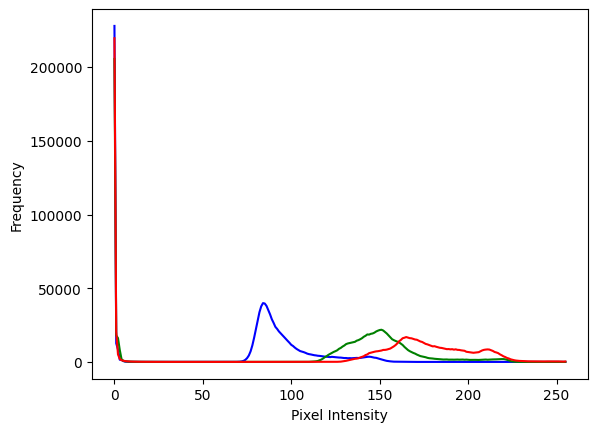

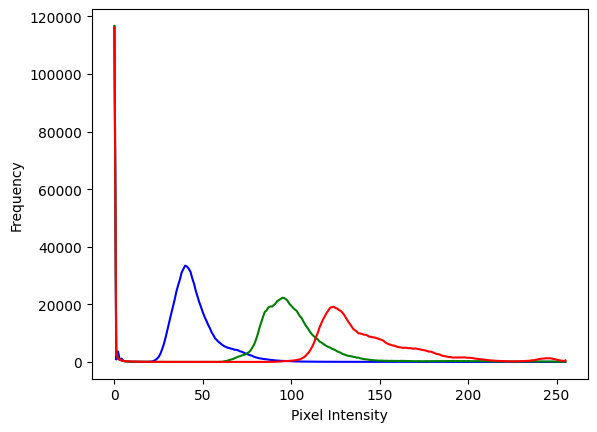

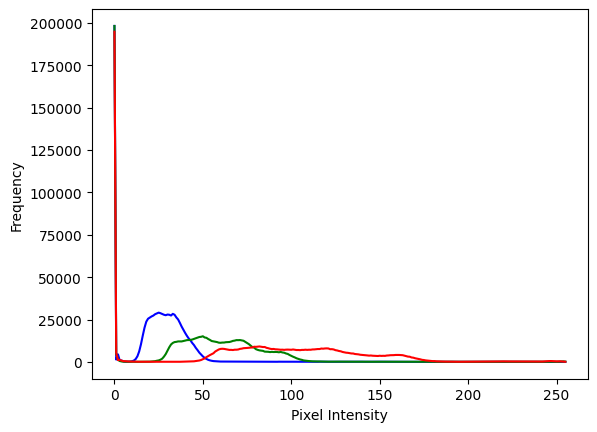

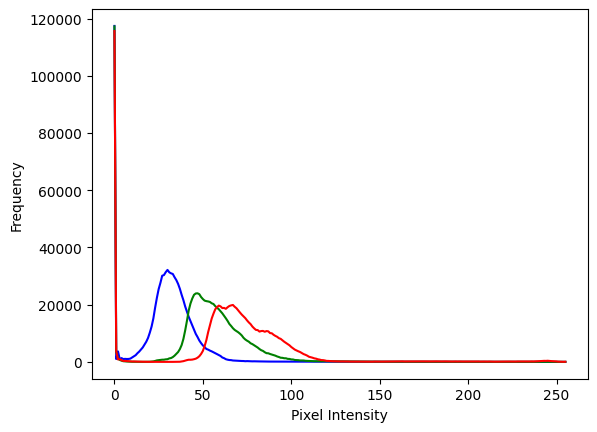

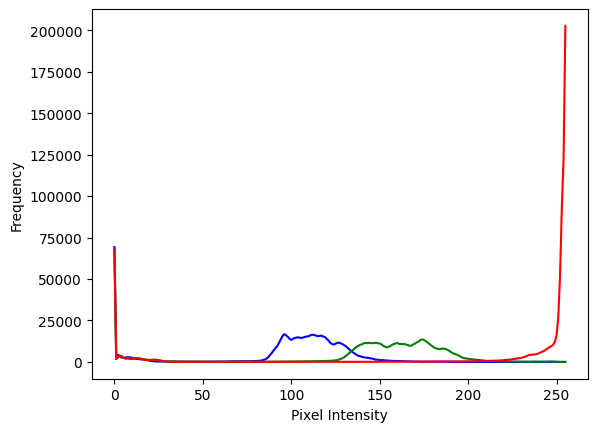

Number of grayscale images: 0


In [54]:
def plot_color_histogram(image):
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        histogram = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(histogram, color=col)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

for filename in os.listdir(input_folder)[:5]:  # Display histogram for first 5 images
    img_path = os.path.join(input_folder, filename)
    img = cv2.imread(img_path)
    if img is not None:
        plot_color_histogram(img)
        
# Check for grayscale images
gray_count = sum([1 for filename in os.listdir(input_folder) 
                  if filename.endswith(('.jpg', '.jpeg', '.png')) and 
                  cv2.imread(os.path.join(input_folder, filename)).shape[2] == 1])

print(f"Number of grayscale images: {gray_count}")


# Blur Detection using Variance of Laplacian

In [55]:
def detect_blur(image, threshold=100):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    variance = cv2.Laplacian(gray, cv2.CV_64F).var()
    return variance < threshold

blurred_images = []

for filename in os.listdir(input_folder):
    img_path = os.path.join(input_folder, filename)
    img = cv2.imread(img_path)

    if img is not None:
        if detect_blur(img):
            blurred_images.append(filename)

print("Number of blurred images:", len(blurred_images))
print("Blurred image examples:", blurred_images[:5])


Number of blurred images: 31323
Blurred image examples: ['36065_right.jpeg', '6514_right.jpeg', '482_right.jpeg', '21203_left.jpeg', '44330_right.jpeg']


# image orientation

In [58]:
import imghdr

def check_orientation(img):
    height, width = img.shape[:2]
    return 'portrait' if height > width else 'landscape'

orientations = [check_orientation(cv2.imread(os.path.join(input_folder, f)))
                for f in os.listdir(input_folder) if imghdr.what(os.path.join(input_folder, f))]

print("Orientation Distribution:", Counter(orientations))


Orientation Distribution: Counter({'landscape': 34969, 'portrait': 139})
